In [2]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris

np.random.seed = 2021

__IRIS Dataset__

In [88]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [89]:
iris = load_iris()

X = iris.data 
Y = iris.target
label = iris.target_names
feature_names = iris['feature_names']

df_iris = pd.DataFrame(X, columns= feature_names)
df_iris_l = pd.DataFrame(X, columns= feature_names) 
df_iris_l['label'] =  Y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris_l['label_names'] = df_iris_l.label.apply(lambda x: features_dict[x])

# df_iris.info()
df_iris_l['label_names'].unique()
# iris.data

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [92]:
# normalize
scaler = MinMaxScaler()  
df_iris_norm = scaler.fit_transform(df_iris)
df_iris_norm

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [84]:
# way 1
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [86]:
# way 2
X_train, X_test, Y_train, Y_test = train_test_split(df_iris, df_iris_l['label'], test_size=0.3)

In [94]:
# way 3
X_train, X_test, Y_train, Y_test = train_test_split(df_iris_norm, df_iris_l['label'], test_size=0.3)

In [96]:
maxi = [2, 0]

for N in range(2, len(X_train)):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(Y_test, Y_pred)
    # print(N, acc)
    if acc > maxi[1]:
        maxi[0] = N
        maxi[1] = acc
    pass

print(f"The best K = {maxi[0]}, score = {maxi[1]}")

The best K = 6, score = 1.0


__Sinthetic Dataset__

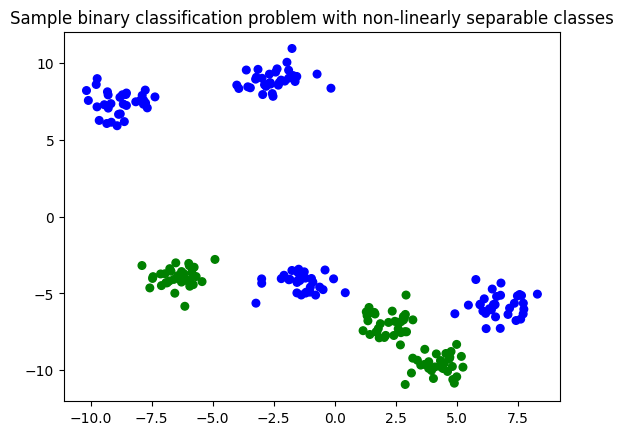

In [110]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# %matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])
np.random.seed = 42
X_D2, y_D2 = make_blobs(n_samples = 225, n_features = 3, centers = 7,
                       cluster_std = 0.7, random_state = 42)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [111]:
# norm
scaler = MinMaxScaler()  
X_D2_norm = scaler.fit_transform(X_D2)
X_D2_norm

array([[0.70505329, 0.19851304, 0.09179317],
       [0.06789822, 0.77008205, 0.47875138],
       [0.91831769, 0.26552588, 0.12329084],
       [0.11985732, 0.84595508, 0.5877639 ],
       [0.95258221, 0.19030846, 0.07977356],
       [0.64403965, 0.15531832, 0.03810947],
       [0.48719404, 0.27464281, 0.51916002],
       [0.40828663, 0.89407199, 0.6646798 ],
       [0.48603023, 0.27204035, 0.48855901],
       [0.83491111, 0.0515056 , 0.91577836],
       [0.47031665, 0.308516  , 0.54394908],
       [0.20298804, 0.32402265, 0.42423681],
       [0.51712375, 0.28985366, 0.56958097],
       [0.57390949, 0.27308461, 0.58939003],
       [0.18735213, 0.33728258, 0.45385866],
       [0.7651636 , 0.04156609, 0.98657655],
       [0.46786628, 0.33452383, 0.50337073],
       [0.65180097, 0.18096631, 0.08439916],
       [0.04497794, 0.7767119 , 0.48169217],
       [0.70974851, 0.15677055, 0.05989541],
       [0.44829564, 0.93528737, 0.65723249],
       [0.21812687, 0.23271996, 0.42925603],
       [0.

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X_D2_norm, y_D2, test_size=0.3)

In [116]:
maxi = [2, 0]

for N in range(2, len(X_train)):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(Y_test, Y_pred)
    # print(N, acc)
    if acc >= maxi[1]:
        maxi[0] = N
        maxi[1] = acc
    pass

print(f"The best K = {maxi[0]}, score = {maxi[1]}")

The best K = 39, score = 1.0
